# 4. Training Classifier

In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

# Dataframe
path_df = "Y:\\Yasin Data\\Kuliah\\Natural Language Processing\\Tugas 4\\NLP-Course-TelU-master\\Text Classification\\Data\\answer\\df.csv"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Y:\\Yasin Data\\Kuliah\\Natural Language Processing\\Tugas 4\\NLP-Course-TelU-master\\Text Classification\\Data\\answer\\features_train.csv"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Y:\\Yasin Data\\Kuliah\\Natural Language Processing\\Tugas 4\\NLP-Course-TelU-master\\Text Classification\\Data\\answer\\labels_train.csv"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Y:\\Yasin Data\\Kuliah\\Natural Language Processing\\Tugas 4\\NLP-Course-TelU-master\\Text Classification\\Data\\answer\\features_test.csv"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Y:\\Yasin Data\\Kuliah\\Natural Language Processing\\Tugas 4\\NLP-Course-TelU-master\\Text Classification\\Data\\answer\\labels_test.csv"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [4]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'Gaussian Naive Bayes', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [5]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 3

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Gaussian Naive Bayes:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [6]:
# if choice == 1:
#     # Create the random grid logistic regression
#     random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
#                'multi_class': ['multinomial'],
#                'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
#                'class_weight': ['balanced', None],
#                'penalty': ['l2']}
# elif choice==2:
#     pass
# elif choice==3:
#     pass
# elif choice==4:
#     # Create the random grid SVM
#     random_grid = {'C': [.0001, .001, .01],
#                   'kernel': ['linear', 'rbf', 'poly'],
#                   'gamma': [.0001, .001, .01, .1, 1, 10, 100],
#                   'degree': [1, 2, 3, 4, 5],
#                   'probability': [True]
#                  }
# elif choice==5:
#     # Create the random grid Random Forest
#     random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
#                'max_features': ['auto', 'sqrt'],
#                'max_depth': [20, 40, 60, 80, 100, None],
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4],
#                'bootstrap': [True, False]
#                      }
    
# pprint(random_grid)

In [7]:
# # Definition of the random search
# random_search = RandomizedSearchCV(estimator=classifier,
#                                    param_distributions=random_grid,
#                                    n_iter=50,
#                                    scoring='accuracy',
#                                    cv=3, 
#                                    verbose=1, 
#                                    random_state=8)

# # Fit the random search model
# random_search.fit(features_train, labels_train)

In [8]:
# print("The best hyperparameters from Random Search are:")
# print(random_search.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(random_search.best_score_)

### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [9]:

# Create the parameter grid based on the results of random search 
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create a base model
classifier = GaussianNB()

In [10]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.8738174...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [11]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'var_smoothing': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.9472


In [12]:
best_classifier = grid_search.best_estimator_

best_classifier

GaussianNB(priors=None, var_smoothing=1.0)

### Model fit and performance

In [13]:
best_classifier.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1.0)

In [14]:
classifier_pred = best_classifier.predict(features_test)

In [15]:
d = {
     'Model': 'Gaussian NB',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Gaussian NB,0.94606,0.919162


In [16]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        81
           1       0.90      0.90      0.90        49
           2       0.94      0.88      0.91        72
           3       0.97      0.97      0.97        72
           4       0.86      0.92      0.89        60

    accuracy                           0.92       334
   macro avg       0.92      0.92      0.92       334
weighted avg       0.92      0.92      0.92       334



### Confusion Matrix

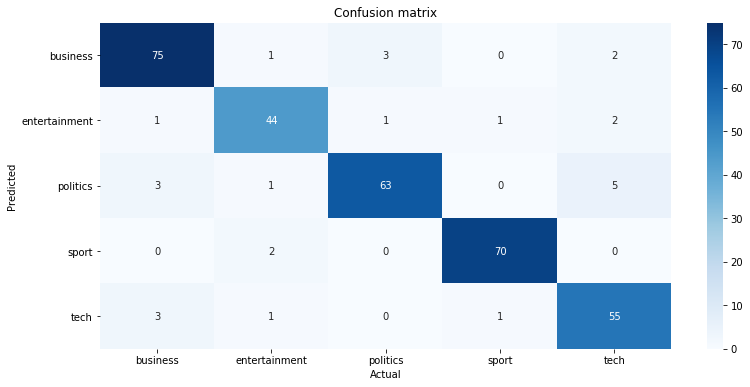

In [17]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [18]:
base_model = GaussianNB()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.8952095808383234

In [19]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9191616766467066

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf